<a href="https://colab.research.google.com/github/SubramDas/Time-Series-Forecasting/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pmdarima


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 65.3 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
!pip install nsepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for nsepy: filename=nsepy-0.8-py3-none-any.whl size=36085 sha256=3054c5d7750734356921b3dec7a6be433894b423c8d2363a1fdfb588f0b36de1
  Stored in directory: /root/.cache/pip/wheels/b9/2c/cb/d74199e422a1dbc20297d10cfff9c54d03e0b5c6694d49ccdd
Successfully built nsepy


In [ ]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np
from nsepy import get_history
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
sbin = get_history(symbol='SBIN', start=date(2000,1,1), end=date(2020,11,1))
print(sbin.head())

           Symbol Series  Prev Close    Open    High     Low    Last   Close  \
Date                                                                           
2000-01-03   SBIN     EQ      225.60  236.00  243.65  234.25  243.65  243.65   
2000-01-04   SBIN     EQ      243.65  243.65  262.00  238.85  258.00  259.10   
2000-01-05   SBIN     EQ      259.10  249.00  264.70  245.00  249.05  248.45   
2000-01-06   SBIN     EQ      248.45  252.00  268.00  252.00  260.50  261.00   
2000-01-07   SBIN     EQ      261.00  261.50  279.90  255.00  279.00  273.30   

              VWAP   Volume      Turnover  Trades  Deliverable Volume  \
Date                                                                    
2000-01-03  240.83  2373228  5.715338e+13     NaN                 NaN   
2000-01-04  251.46  4495741  1.130506e+14     NaN                 NaN   
2000-01-05  252.35  3434058  8.666008e+13     NaN                 NaN   
2000-01-06  262.18  6658801  1.745817e+14     NaN                 NaN   
2

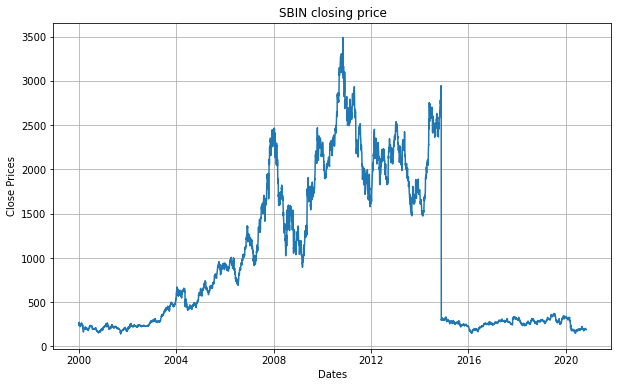

In [ ]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(sbin['Close'])
plt.title('SBIN closing price')
plt.show()


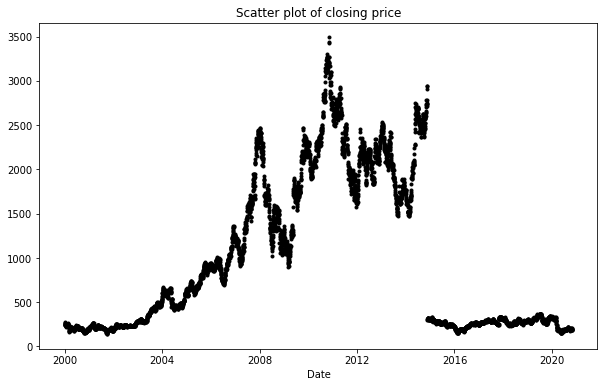

In [ ]:
plt.figure(figsize=(10,6))
df_close = sbin['Close']
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()


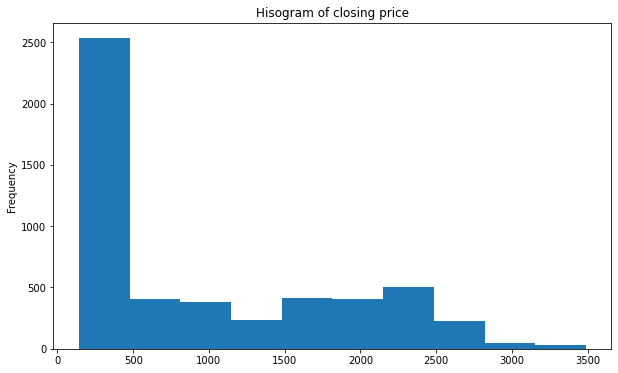

In [ ]:
plt.figure(figsize=(10,6))
df_close = sbin['Close']
df_close.plot(style='k.',kind='hist')
plt.title('Hisogram of closing price')
plt.show()


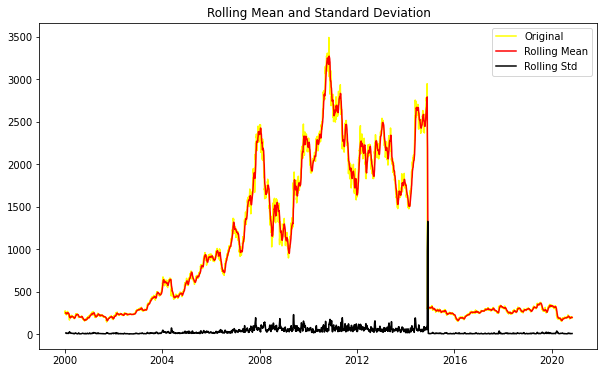

Results of dickey fuller test
Test Statistics                  -1.914523
p-value                           0.325260
No. of lags used                  3.000000
Number of observations used    5183.000000
critical value (1%)              -3.431612
critical value (5%)              -2.862098
critical value (10%)             -2.567067
dtype: float64


In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='yellow',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

test_stationarity(sbin['Close'])

<Figure size 720x432 with 0 Axes>

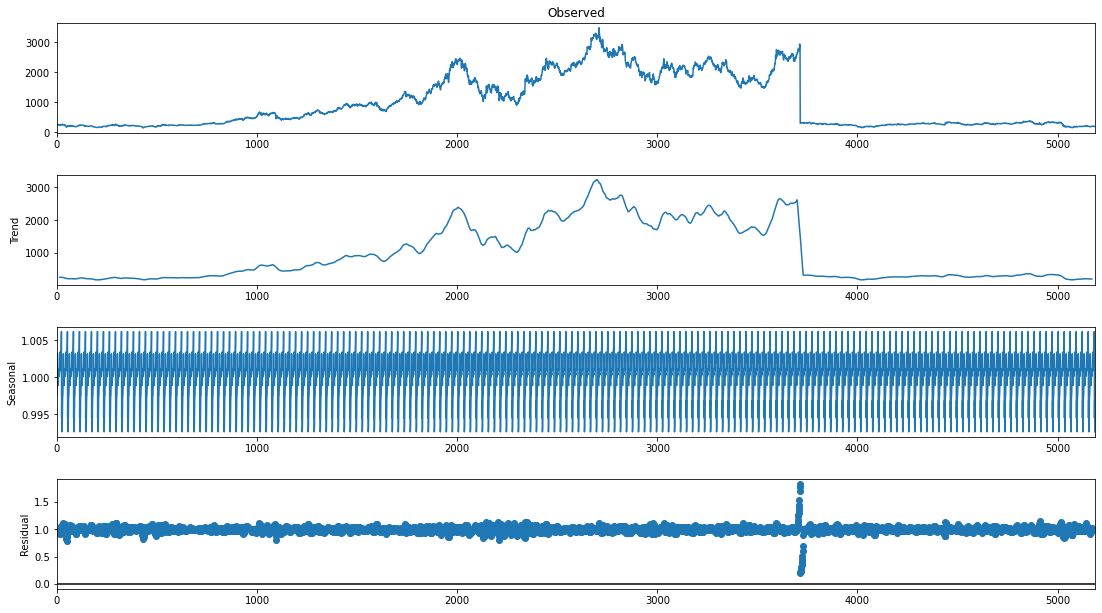

In [ ]:
import statsmodels.api as sm
result = seasonal_decompose(df_close.values, model='multiplicative', period=30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

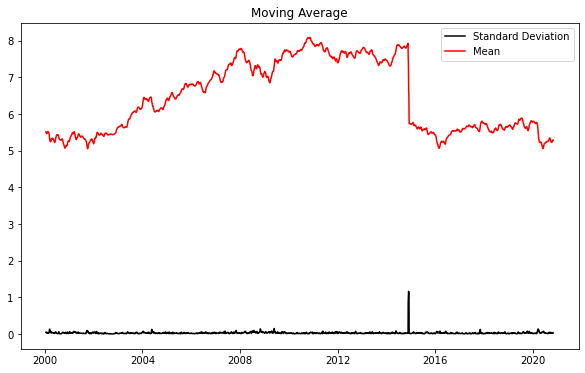

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(sbin['Close'])
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

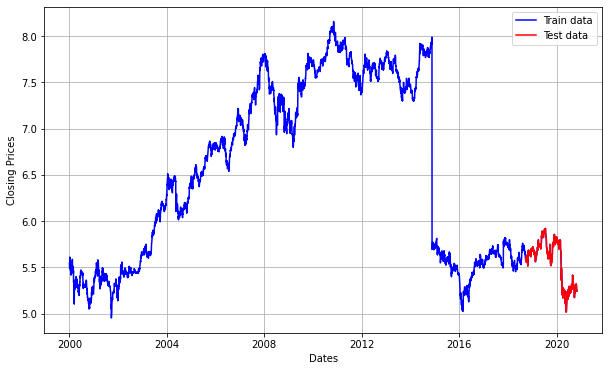

In [ ]:
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'blue', label='Train data')
plt.plot(test_data, 'red', label='Test data')
plt.legend()

In [ ]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
test='adf',       # use adftest to find optimal 'd'
max_p=3, max_q=3, # maximum p and q
m=1,              # frequency of series
d=None,           # let model determine 'd'
seasonal=False,   # No Seasonality
start_P=0, 
D=0, 
trace=True,
error_action='ignore',  
suppress_warnings=True, 
stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-16607.561, Time=1.62 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-16607.961, Time=0.82 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-16608.035, Time=3.35 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-16609.560, Time=0.49 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-16606.477, Time=3.87 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 10.215 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4665
Model:               SARIMAX(0, 1, 0)   Log Likelihood                8305.780
Date:                Fri, 20 Jan 2023   AIC                         -16609.560
Time:                        06:16:55   BIC                         -16603.113
Sample:                             0   HQIC                        -16607.293
                               - 4665                            

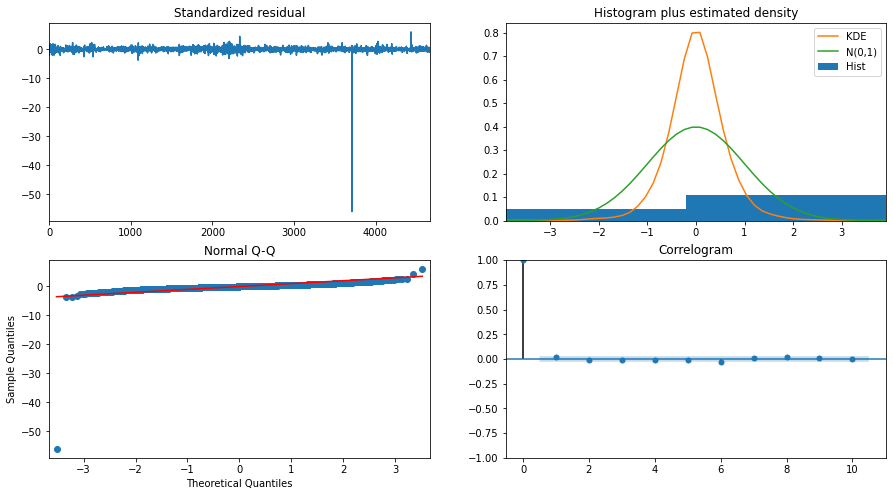

In [ ]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [ ]:
!pip install statsmodels==0.12.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 16.5 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.5
    Uninstalling statsmodels-0.13.5:
      Successfully uninstalled statsmodels-0.13.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pmdarima 2.0.2 requires statsmodels>=0.13.2, but you have statsmodels 0.12.2 which is incompatible.


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model_arima = ARIMA(train_data, order=(3, 1, 2))
fitted = model_arima.fit()
print(fitted.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  inferred_freq = False
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  inferred_freq = False
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  inferred_freq = False


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4665
Model:                 ARIMA(3, 1, 2)   Log Likelihood                8307.864
Date:                Fri, 20 Jan 2023   AIC                         -16603.727
Time:                        06:18:34   BIC                         -16565.041
Sample:                             0   HQIC                        -16590.120
                               - 4665                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0115      5.456      0.002      0.998     -10.681      10.704
ar.L2         -0.0076      3.209     -0.002      0.998      -6.296       6.281
ar.L3         -0.0118      0.152     -0.078      0.9

In [ ]:
# Forecast

fc, se, conf = fitted.forecast(519, alpha=0.05)  # 95% confidence

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.


ValueError: ignored

In [ ]:
output=fitted.forecast(steps=len(test_data))
fc=list(output)
print(len(test_data))

519


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.


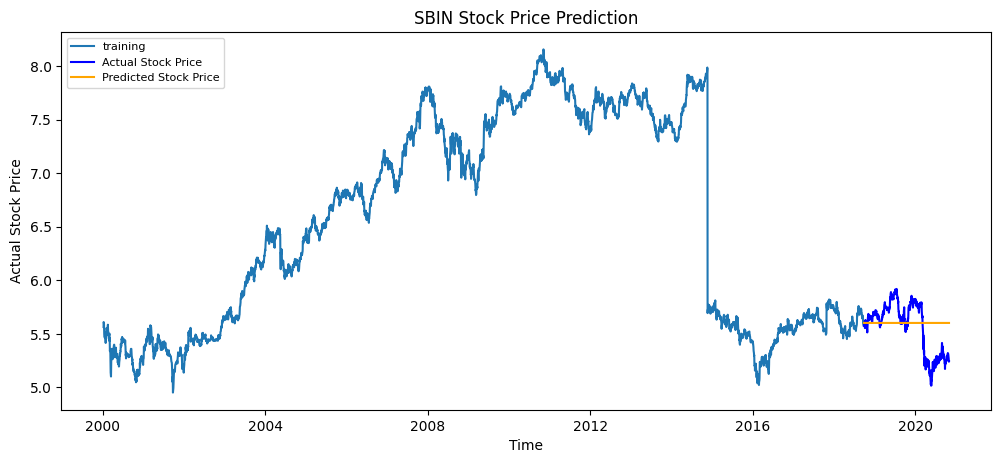

In [ ]:
fc_series = pd.Series(fc, index=test_data.index)
# lower_series = pd.Series(data=conf[:, 0], index=test_data.index)
# upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
# plt.fill_between(lower_series.index, lower_series, upper_series, 
                #  color='k', alpha=.10)
plt.title('SBIN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()


In [ ]:
?pd.Series